In [ ]:
import pymc3 as pm

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
data = np.repeat((0, 1), (3, 6))
data

In [ ]:
with pm.Model("") as normal_approximation:
    p = pm.Uniform('p', 0, 1)
    w = pm.Binomial('w', n=len(data), p=p, observed=data.sum())
    mean_q = pm.find_MAP()
    std_q = ((1/pm.find_hessian(mean_q, vars=[p]))**0.5)[0]
mean_q['p'], std_q

In [ ]:
# analytical calculation
w, n = 6, 9
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x , w+1, n-w+1),
         label='True posterior')

# quadratic approximation
plt.plot(x, stats.norm.pdf(x, mean_q['p'], std_q),
         label='Quadratic approximation')
plt.legend(loc=0, fontsize=13)

plt.title('n = {}'.format(n), fontsize=14)
plt.xlabel('Proportion water', fontsize=14)
plt.ylabel('Density', fontsize=14);

## quantile approximation

In [ ]:
x = np.linspace(0, 1, 20)
prior = np.repeat((0, 1), (0, 20))
likelihood = stats.binom.pmf(3, 4, p=x)
unstd_posterior = likelihood*prior
posterior = unstd_posterior / unstd_posterior.sum()

In [ ]:
plt.scatter(x, posterior)

In [ ]:
x = np.linspace(0, 1, 20)
prior = np.ones(len(x))
prior[x < 0.5] = 0
prior[x >= 0.5] = 1
likelihood = stats.binom.pmf(3, 3, p=x)
unstd_posterior = likelihood*prior
posterior = unstd_posterior / unstd_posterior.sum()

In [ ]:
plt.scatter(x, posterior)

In [ ]:
likelihood = np.array([0.2, 0.1])
prior = np.array([1, 1])
posterior = likelihood*prior
posterior / sum(posterior)
0.66666667 * 0.2 + 0.3333 * 0.1

In [ ]:
# prob(A|twins)
# prob(twins|A) * prob(A) / prob(twins)
(0.1 * 0.5) / (0.1 * 0.5 + 0.2*0.5)

In [14]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


(0.0, 10.0)

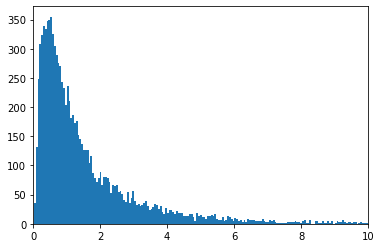

In [116]:
plt.hist(np.exp(stats.norm.rvs(size=10000, loc=0, scale=1)), bins=1000);None
plt.xlim(0, 10)

In [115]:
x = stats.norm.rvs(size=10000, loc=0, scale=1).min()
np.exp(-1)

0.36787944117144233

In [53]:
np.e**4

54.59815003314423